In order to execute this notebook, go to the menu bar and click **Run**/**Run all cells**. You can also run individual cells by selecting the cell (a blue bar will appear to the left of the active cell, then pressing `Shift+Enter`.

> **NOTE** Before running this notebook, you must install the external dependencies.
> To to this, uncomment the following cell by removing the leading `#` character, execute the cell,
> then put the `#` character back to prevent it from running again, thereby "commenting it out". Once everything is installed you may
> re-run the commented-out cell to hide the text generated by the installation.

In [1]:
# !pip install -Ur requirements.txt

In [2]:
from itertools import cycle
# Linear algebra library
import numpy as np
# Plotting library
import matplotlib.pyplot as plt
# The next two lines set reasonable plot style defaults
import scienceplots
plt.style.use(["science", "notebook"]) #"typewriter") #

## Define the Model

Set up basic model geometry

In [3]:
from condition import steel_cantilever, analyze

## Post-processing

#### Displacement History

d
v
a


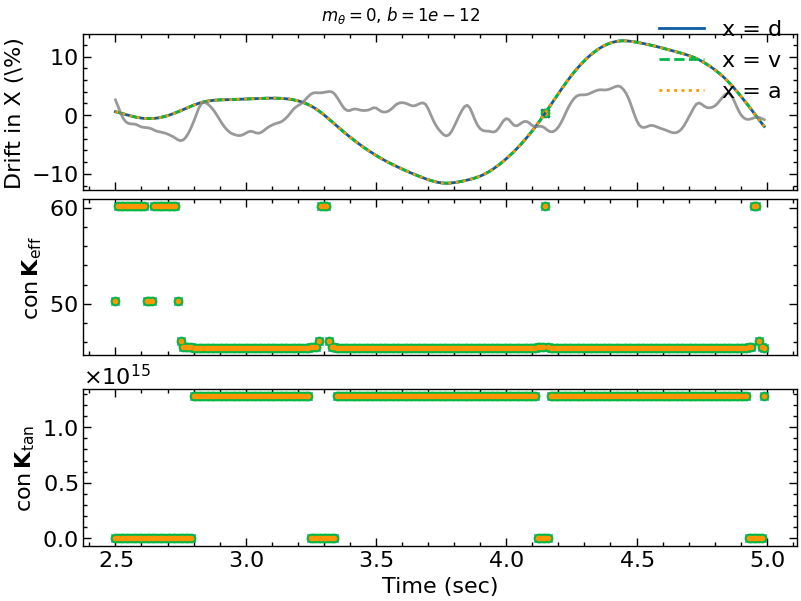

In [4]:
L = 8*12
t0 = 250
fig, ax = plt.subplots(3, constrained_layout=True, sharex=True)
markers = cycle(["x", "o", "."])
lines   = cycle(["-", "--", ":"])
ax[-1].set_xlabel('Time (sec)')
ax[ 0].set_ylabel('Drift in X (\\%)')
ax[ 1].set_ylabel(r"$\operatorname{con}\mathbf{K}_{\mathrm{eff}}$")
ax[ 2].set_ylabel(r"$\operatorname{con}\mathbf{K}_{\mathrm{tan}}$")

mass = 0 #1e-4
hard = 1e-12
damp = {}

for form in "d", "v", "a":
    print(form)
    marker = next(markers)
    model = steel_cantilever(mass, hard, damp)
    t, u, ug, con, det, bad, itr = analyze(model, form, "d", 1, 500) #260)
    drift = (u[:,0]/L)*100
    bad &= (t > t[t0])
    ax[0].plot(t[t0:], drift[t0:], next(lines), label=f"x = {form}")
    ax[0].scatter(t[bad], drift[bad], marker=marker)
    
    ax[1].plot(t[t0:], con["A"][t0:], marker)
    # ax[2].plot(t[t0:], det["A"][t0:])
    ax[2].plot(t[t0:], con["K"][t0:], marker)

ax[0].plot(t[t0:], ug[t0:]*10, alpha=0.8, color="gray")
fig.suptitle(rf"$m_{{\theta}} = {mass}$, $b = {hard}$")
fig.legend();
# fig.savefig("drift.png")

### Parameters

Analysis failed
Analysis failed
Analysis failed
Analysis failed


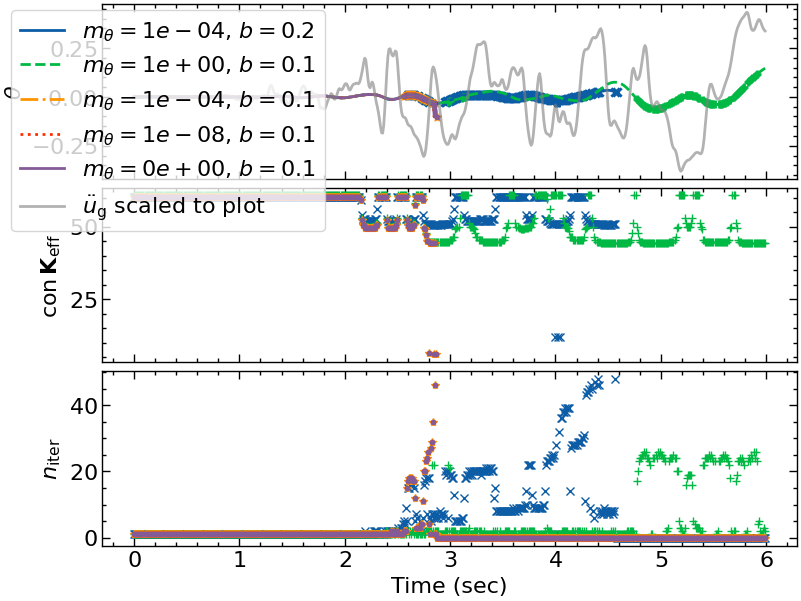

In [5]:
t0 = 0 #250
fig, ax = plt.subplots(3, constrained_layout=True, sharex=True)
markers = cycle(["x", "+", "*", ".", "."])
lines   = cycle(["-", "--", "-.", ":"])
ax[-1].set_xlabel('Time (sec)')
ax[ 0].set_ylabel(r'$\theta$') #'Drift in X (\\%)')
ax[ 1].set_ylabel(r"$\operatorname{con}\mathbf{K}_{\mathrm{eff}}$")
ax[ 2].set_ylabel(r"$n_{\mathrm{iter}}$")

damp = {}
for mass, hard in ((1e-4,0.2), (1,0.1), (1e-4, 0.1), (1e-8, 0.1), (0.0, 0.1)):
    cantilever = steel_cantilever(mass, hard, damp)
    t, u, ug, con, det, bad, itr = analyze(cantilever, "a", "a", 0.8, 600) #260)

    drift = u[:,2] #(u[:,0]/L)*100
    assert not any(bad[t < t[t0]])
    bad &= (t > t[t0])

    marker = next(markers)
    ax[0].scatter(t[bad], drift[bad], marker=marker)
    ax[0].plot(t[t0:], drift[t0:], next(lines), label=rf"$m_{{\theta}} = {mass:3.0e}$, $b = {hard}$")
    
    ax[1].plot(t[t0:], con["A"][t0:], marker)
    # ax[2].plot(t[t0:], det["A"][t0:])
    # ax[2].plot(t[t0:], con["K"][t0:], marker)
    ax[2].plot(t[t0:], itr[t0:], marker)

ax[0].plot(t[t0:], ug[t0:]*.7, alpha=0.6, color="gray", label=r"$\ddot{u}_{\mathrm{g}}$ scaled to plot")

# fig.suptitle(rf"$m_{{\theta}} = {mass}$, $b = {hard}$")
fig.legend(frameon=True, loc="upper left");
